In [1]:
import pandas as pd

# plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%config InlineBackend.figure_format = 'retina'
sns.set_style({'font.family':'sans-serif', 'font.sans-serif':'Arial'})

In [2]:
pheno = pd.read_csv('../data/pheno_final.tsv', sep='\t')
pheno = pheno.drop_duplicates('subject')
pheno = pheno.set_index('subject', drop=False)

rel = pd.read_csv('../data/family_summaries.tsv', sep='\t')
rel = rel[rel.subject != 'SG011']
rel = rel.set_index('subject', drop=False)

In [3]:
zscores = pd.read_csv('../outlier_expression_analysis/zscores.protein_coding.lcl_expressed.no_combat.tsv', sep='\t')
zscores = zscores.set_index('Name')
zscores.index = zscores.index.to_series().apply(lambda s: s.split('.')[0])

# pca

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(zscores.T)
df_pca = pd.DataFrame(df_pca, index=zscores.columns)
pheno['pca1'] = df_pca[0]
pheno['pca2'] = df_pca[1]

# plot

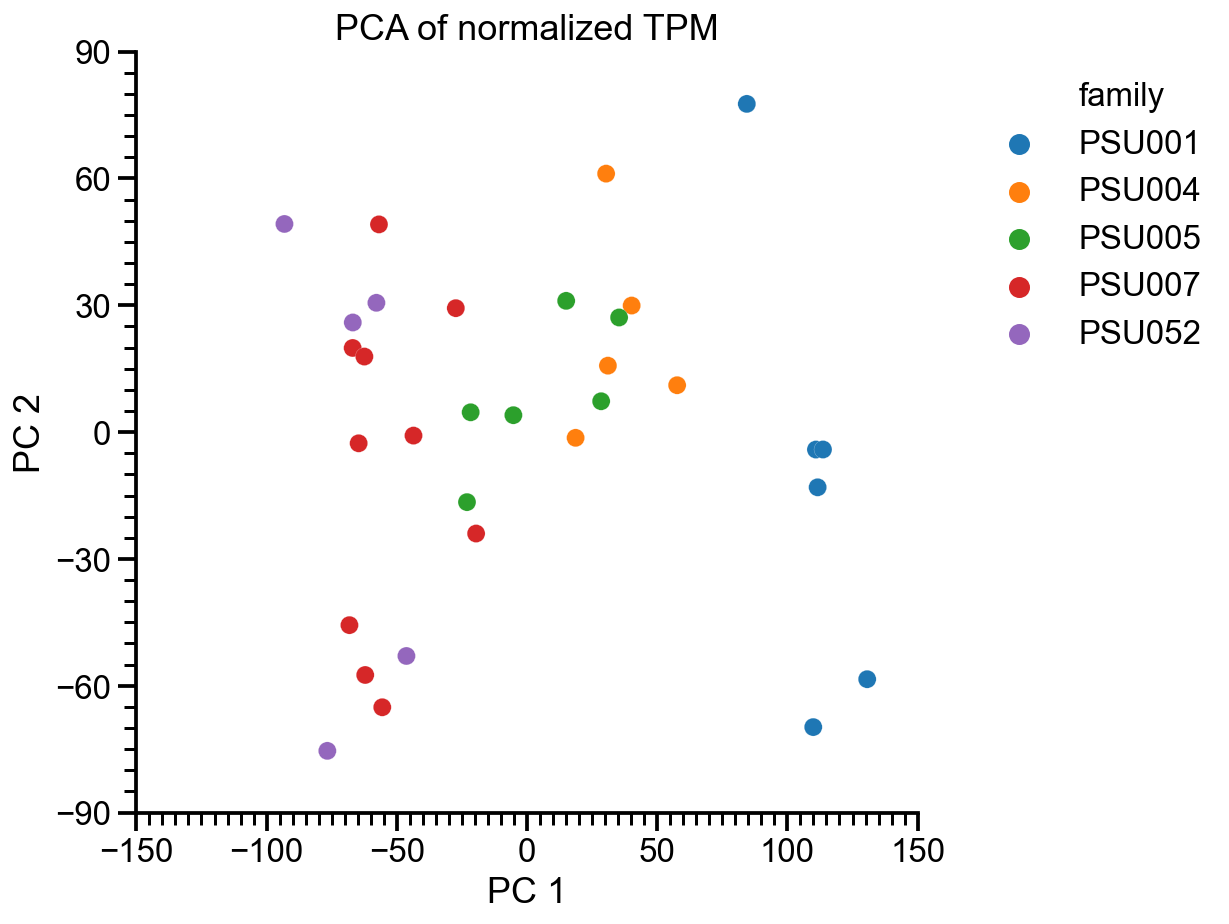

In [6]:
plt.figure(figsize=(7,7))
sns.set_context('talk')


g = sns.scatterplot(data=pheno, 
                x='pca1', y='pca2',hue='family', linewidth=0.1)


plt.legend(frameon=False,  bbox_to_anchor=(1.05, 1), loc=2)

g.set_title('PCA of normalized TPM')
g.set_xlabel('PC 1')
g.set_ylabel('PC 2')


g.set_xlim([-150, 150])
g.set_ylim([-90,90])

g.get_yaxis().set_major_locator(MultipleLocator(30))
g.get_yaxis().set_minor_locator(MultipleLocator(5))

g.get_xaxis().set_major_locator(MultipleLocator(50))
g.get_xaxis().set_minor_locator(MultipleLocator(5))

sns.despine()


# plt.tight_layout()
plt.savefig('figures/S2_pca.pdf', dpi=300)